## **16기 멤버 코딩 테스트**
이 코딩 테스트는 **총 65점 만점**이며, **3개의 섹션으로 구성**되어 있습니다.

- 테스트를 시작하기 전에 하단 *필요 패키지* 를 먼저 실행하신 후 진행하시면 됩니다.


</br>

#### **다음 2가지 사항을 반드시 준수해주세요.**

1. **.ipynb 파일 형식**으로 저장 후 다음의 구글폼으로 제출

    https://docs.google.com/forms/d/e/1FAIpQLSffUB1vuh9mC0eCOjSCGW4P943G2dC4JXS0oG6mxiG2oaCRdg/viewform?usp=header

2. **파일명 마지막에 본인 이름 추가**  
  예시 : 16기_멤버_코딩테스트_문제지_비타민

## **필요 패키지**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **1부 : python, numpy, pandas 기초** (20점)

## **문제 1.1 (3점)**

**오늘의 날짜, 자신의 이름, 자신의 생일, MBTI**를 리스트로 저장하고 그것을 Series 형태로 변환하여 출력하세요.

출력 예시 :

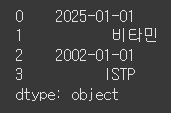

In [ ]:
profile = ['2025-01-01', '비타민', '2002-01-01', 'ISTP']
profile_series = pd.Series(profile)
print(profile_series)

0    2025-01-01
1           비타민
2    2002-01-01
3          ISTP
dtype: object


## **문제 1.2 (4점)**



정수 n과 m을 변수로 받아 def solution을 통해 두 숫자의 **공약수**와 **최대공약수**를 출력하세요.

(def solution 함수에 빈 부분을 채워 완성하세요.)

출력 예시 :

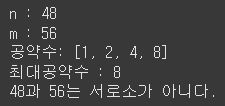

In [ ]:
def solution(n, m):
    # 공약수 구하기
    commonDivisor = []
    for i in range(1, min(n, m) + 1):
        if n % i == 0 and m % i == 0:
            commonDivisor.append(i)
    print(f'공약수: {commonDivisor}')

    # 최대공약수
    gcd = max(commonDivisor)
    print(f'최대공약수: {gcd}')

    # 서로소 여부
    if gcd == 1:
        print(f'{n}과 {m}는 서로소이다.')
    else:
        print(f'{n}과 {m}는 서로소가 아니다.')

# 실행
n = int(input('n : '))
m = int(input('m : '))
solution(n, m)

n : 48
m : 56
공약수: [1, 2, 4, 8]
최대공약수: 8
48과 56는 서로소가 아니다.


## **문제 1.3 (4점)**

딕셔너리를 활용하여 다음의 DataFrame을 출력하세요.

- 딕셔너리는 **LR_dict**에 저장
- DataFrame은 LR_df에 저장
- NaN은 결측치

</br>
(아래 복붙해서 사용하세요.)

E.coli, S.enterica, S.aureus, L. mono_

70% Ethanol, 10% CH3COOH, UV 10min

</br>

출력 예시 :  
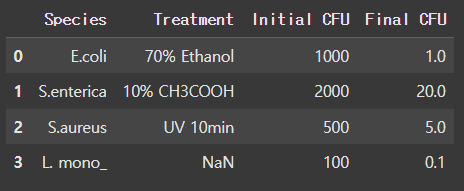

In [ ]:
LR_dict = {
    'Species': ['E.coli', 'S.enterica', 'S.aureus', 'L. mono_'],
    'Treatment': ['70% Ethanol', '10% CH3COOH', 'UV 10min', np.nan],
    'Initial CFU': [1_000, 2_000, 500, 100],
    'Final CFU': [1, 20, 5, 0.1],
}

LR_df = pd.DataFrame(LR_dict)
LR_df

,Species,Treatment,Initial CFU,Final CFU
0,E.coli,70% Ethanol,1000,1.0
1,S.enterica,10% CH3COOH,2000,20.0
2,S.aureus,UV 10min,500,5.0
3,L. mono_,NaN,100,0.1


## **문제 1.4 (3점)**

위에서 만들어진 LR_df의 ***Species*** 열을 인덱스로 지정한 후 ***S.enterica*** 행을 제거하세요.

</br>

출력 예시 :  
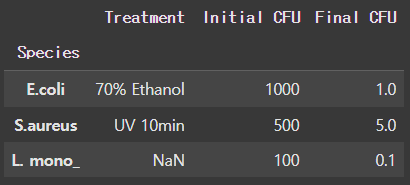

In [ ]:
LR_df.set_index('Species', inplace=True)
LR_df.drop('S.enterica', inplace=True)
LR_df

,Treatment,Initial CFU,Final CFU
Species,,,
E.coli,70% Ethanol,1000,1.0
S.aureus,UV 10min,500,5.0
L. mono_,NaN,100,0.1


## **문제 1.5 (3점)**

위에서 만들어진 LR_df의 결측치를 **HOCl water**로 채우세요.

</br>

출력 예시 :  
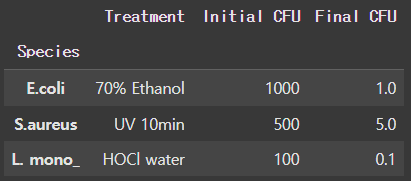

In [ ]:
LR_df.fillna('HOCl water', inplace=True)
LR_df

,Treatment,Initial CFU,Final CFU
Species,,,
E.coli,70% Ethanol,1000,1.0
S.aureus,UV 10min,500,5.0
L. mono_,HOCl water,100,0.1


## **문제 1.6 (3점)**

LR_df에 ***Log Reduction*** 열을 추가하여 Log Reduction 값을 넣어주세요.

Log Reduction를 계산하는 공식은 다음과 같습니다.
> Log Reduction = log10(Initial CFU) - log10(Final CFU)

</br>

출력 예시 :  

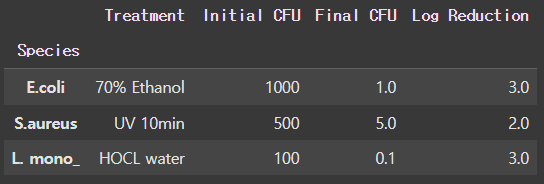

In [ ]:
LR_df['Log Reduction'] = np.log10(LR_df['Initial CFU']) - np.log10(LR_df['Final CFU'])
LR_df

,Treatment,Initial CFU,Final CFU,Log Reduction
Species,,,,
E.coli,70% Ethanol,1000,1.0,3.0
S.aureus,UV 10min,500,5.0,2.0
L. mono_,HOCL water,100,0.1,3.0


# **2부 : DataFrame 전처리 및 활용** (15점)

In [ ]:
# 코랩 사용자만 아래 마운트 코드 실행
# 이외의 경우 해당 코드 실행X
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **문제 2.1 (3점)**

tips.csv 데이터를 불러오고, **tip_df** 변수에 저장하여 첫 5개 행을 출력하세요.

</br>

출력 예시 :

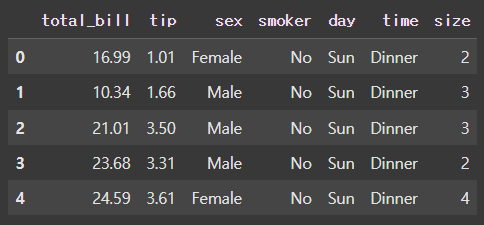

In [ ]:
tip_df = pd.read_csv('/content/drive/MyDrive/BITAmin/16기_멤버_코딩테스트/tips.csv')
tip_df.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## **문제 2.2 (3점)**

time은 **Dinner**이며, tip은 **5달러 이상 낸 흡연자**인 행들을 출력하세요.

In [ ]:
tip_df[(tip_df['time'] == 'Dinner') &
        (tip_df['tip'] >= 5) &
        (tip_df['smoker'] == 'Yes')]

,total_bill,tip,sex,smoker,day,time,size
73,25.28,5.00,Female,Yes,Sat,Dinner,2
170,50.81,10.00,Male,Yes,Sat,Dinner,3
172,7.25,5.15,Male,Yes,Sun,Dinner,2
181,23.33,5.65,Male,Yes,Sun,Dinner,2
183,23.17,6.50,Male,Yes,Sun,Dinner,4
211,25.89,5.16,Male,Yes,Sat,Dinner,4
214,28.17,6.50,Female,Yes,Sat,Dinner,3


## **문제 2.3 (3점)**

다음 순서대로 진행하세요.

1. Male(남자)는 0, Female(여자)은 1로,
Smoker(흡연자)는 0, 비흡연자 1로 **문자열을 숫자로 매핑**
2. ***'total_bill', 'tip', 'sex', 'smoker'*** 열로 구성된 데이터를 selected_df 변수에 저장
3. 첫 5행을 출력

출력 예시 :

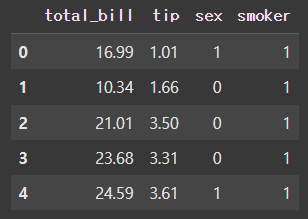

In [ ]:
# 1. 문자열을 숫자로 매핑
tip_df['sex'] = tip_df['sex'].map({'Male': 0, 'Female': 1})
tip_df['smoker'] = tip_df['smoker'].map({'Yes': 0, 'No': 1})

# 2. 지정한 열만 추출
selected_df = tip_df[['total_bill', 'tip', 'sex', 'smoker']]

# 3. 첫 5행 출력
selected_df.head(5)

,total_bill,tip,sex,smoker
0,16.99,1.01,1,1
1,10.34,1.66,0,1
2,21.01,3.50,0,1
3,23.68,3.31,0,1
4,24.59,3.61,1,1


## **문제 2.4 (3점)**

아래 tip_df에서 각 변수들 간의 선형 상관관계를 아래 조건에 맞춰 **heatmap**으로 시각화하세요.

- seaborn 활용
- **각 cell의 값** 표기 (이때, 소수점 2번째 자리까지만 표기)
- 히트맵의 색은 **'coolwarm'** 으로 설정
- 히트맵의 제목은 **'Correlation Heatmap'** 으로 설정

</br>

출력예시:

- tip_df

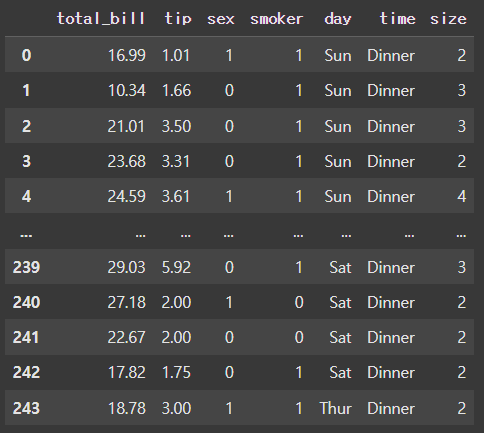

- heatmap

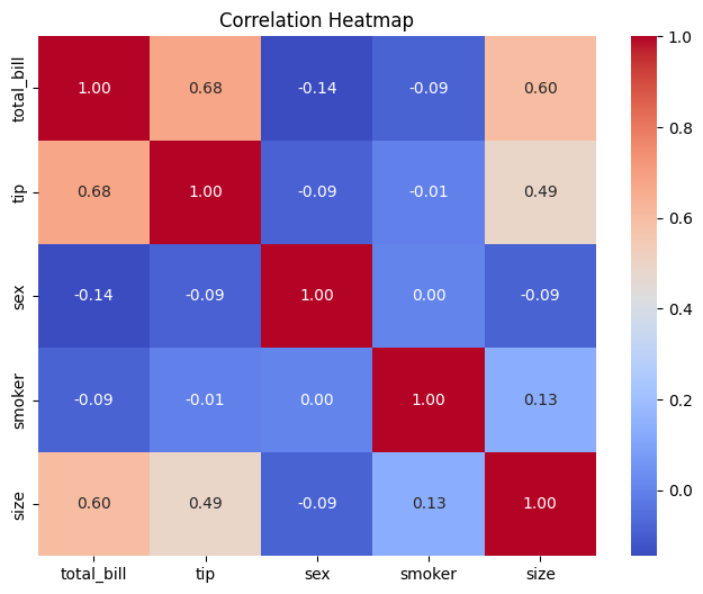

In [ ]:
# 먼저 실행하세요.

# 1. 숫자형 변수만 선택
num_tip_df = tip_df.select_dtypes(include=['int64','float64'])
# 2. 상관계수 계산
corr = num_tip_df.corr()

<function matplotlib.pyplot.show(close=None, block=None)>

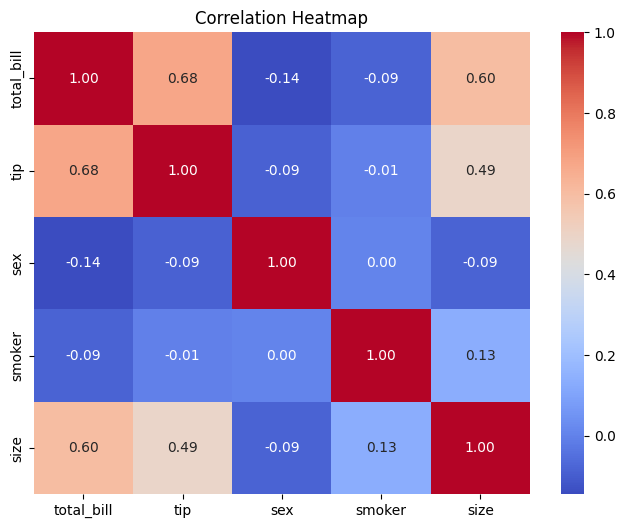

In [ ]:
# 3. heatmap 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show

## **문제 2.5 (3점)**

문제 2.4에서 출력한 heatmap을 보고, 변수들 중 **가장 유의미한 상관관계**를 나타내는 두 변수의 이름을 적으세요.

(heatmap 결과 해석 문제로, 코드가 아닌 변수 이름을 적으시면 됩니다.)

In [ ]:
'total bill'과 'tip'

# **3부 : 전처리 및 분석** (30점)

## **문제 3.1 (3점)**

Patient_info.csv 파일을 불러오고 **patient** 변수에 저장한 후, 각 컬럼의 데이터 타입과 결측값 여부 확인하세요.

In [ ]:
patient = pd.read_csv('/content/drive/MyDrive/BITAmin/16기_멤버_코딩테스트/Patient_info.csv')
patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      70000 non-null  int64  
 1   age     70000 non-null  int64  
 2   gender  70000 non-null  int64  
 3   height  68135 non-null  float64
 4   weight  66509 non-null  float64
dtypes: float64(2), int64(3)
memory usage: 2.7 MB


## **문제 3.2 (2점+3점)**

**결측치**가 존재한다면, 해당 id를 **null_id 리스트**를 만들어 저장하고(2점),

결측치를 해당 열의 **평균값**으로 채우세요(3점).

In [ ]:
# 결측치가 있는 행의 id 저장 (2점)
null_id = patient[patient.isnull().any(axis=1)]['id'].tolist()

In [ ]:
# 결측치를 해당 열의 평균값으로 채우기 (3점)
patient.fillna(patient.mean(numeric_only=True), inplace=True)

In [ ]:
# patient.isnull().sum() 실행 시 모든 열의 결측값이 0이 나와야 함.

## **문제 3.3 (6점)**

CardioRiskFactors_info.csv 파일 불러오고 **crk_info** 변수에 저장한 후, 다음과 같은 방식으로 crk_info 데이터프레임과 합치고 출력하세요.

- patient를 핵심 데이터로, crk_info을 보조데이터로, ***id***열을 기준으로 left 방식으로 조인
- 결합한 데이터프레임을 **merged_patient_crk** 변수로 저장
- 첫 5개 행을 출력

In [ ]:
crk_info = pd.read_csv('/content/drive/MyDrive/BITAmin/16기_멤버_코딩테스트/CardioRiskFactors_info.csv')
merged_patient_crk = pd.merge(patient, crk_info, how='left', on='id')
merged_patient_crk.head(5)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168.0,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156.0,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165.0,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169.0,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156.0,56.0,100,60,1,1,0,0,0,0


## **문제 3.4 (5점)**

 null_id 리스트에 해당하는 id 행 제거 후(1점),

 각 환자별 BMI를 계산해서 merged_patient_crk에 새로운 ***BMI*** 열을 추가하세요(2점).

 그 값을 기반으로 BMI 범주(저체중, 정상, 과체중, 비만)를 구해 ***BMI_range*** 열에 추가하세요(2점).

---
**<BMI 계산 공식>**

 > BMI = weight[kg] / {(height/100)[m] **2}

 (이때, [ ] 안은 단위를 의미합니다.)

---
**<BMI 범주>**

- 저체중 : BMI 18.5미만

- 정상 : BMI 18.5 ~22.9

- 과체중 : BMI 23 ~24.9

- 비만 : BMI 25이상


In [ ]:
# null_id 리스트에 해당하는 id 행 제거 (1점)
merged_patient_crk = merged_patient_crk[~merged_patient_crk['id'].isin(null_id)].copy()

In [ ]:
# 환자별 BMI 계산한 후, BMI 열에 추가 (2점)
merged_patient_crk['BMI'] = merged_patient_crk['weight'] / ((merged_patient_crk['height'] / 100) ** 2)

In [ ]:
# BMI 범주 분류 후, BMI_range 열에 추가 (2점)
def get_bmi_range(bmi):
    if bmi < 18.5:
        return '저체중'
    elif 18.5 <= bmi < 22.9:
        return '정상'
    elif 23 <= bmi < 24.9:
        return '과체중'
    else:
        return '비만'

merged_patient_crk['BMI_range'] = merged_patient_crk['BMI'].apply(get_bmi_range)

## **문제 3.5 (6점)**

ap_hi(수축기 혈압) 값을 기준으로 상위 25%는 '고혈압', 하위 25%는'저혈압' 그룹으로 구분한 결과를 먼저 실행한 뒤,

각 그룹 내에서 ***BMI_range***열 기준으로 groupby 한 뒤, **평균 BMI**와 **심장질환(cardio) 발생률[%]** 을 구하세요.

- 고혈압 그룹의 groupby 결과는 **'high_bp_stats'** , 저혈압 그룹의 groupby 결과는 **'low_bp_stats'** 에 저장
- 평균 BMI는 **'avg_BMI'** , 심장질환 발생률은 **'cardio_rate'** 라고 설정
- 심장질환 발생률(cardio_rate)은 cardio 값(0과 1)의 평균으로 함
- **고혈압** 그룹은 **인덱스 초기화**를 진행

---
출력 예시 :

< high_bp_stats >

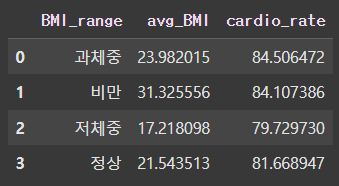

< low_bp_stats >

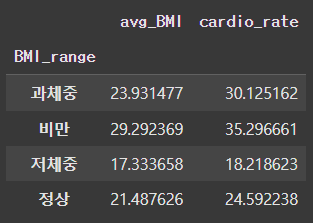

In [ ]:
# 먼저 실행하세요.

# 상위 25%, 하위 25% 기준 계산
q75 = merged_patient_crk['ap_hi'].quantile(0.75)
q25 = merged_patient_crk['ap_hi'].quantile(0.25)

# 고혈압 그룹은 high_bp로, 저혈압 그룹은 low_bp로 분리
high_bp = merged_patient_crk[merged_patient_crk['ap_hi'] >= q75]
low_bp = merged_patient_crk[merged_patient_crk['ap_hi'] <= q25]

In [ ]:
# 고혈압 그룹 (3점)

# BMI_range별 평균 BMI와 cardio 발생률
high_bp_stats = high_bp.groupby('BMI_range').agg(
    avg_BMI=('BMI', 'mean'),
    cardio_rate=('cardio', 'mean') # 0과 1로 된 cardio 평균 = 발생률
).reset_index()

# cardio_rate를 백불율로 변환하고 출력
high_bp_stats['cardio_rate'] = high_bp_stats['cardio_rate'] * 100

high_bp_stats

,BMI_range,avg_BMI,cardio_rate
0,과체중,23.982015,84.506472
1,비만,31.325556,84.107386
2,저체중,17.218098,79.729730
3,정상,21.543513,81.668947


In [ ]:
# 저혈압 그룹 (3점)

# 저혈압 그룹의 BMI range별 평균 BMI와 cardio 발생률
low_bp_stats = low_bp.groupby('BMI_range').agg(
    avg_BMI=('BMI', 'mean'),
    cardio_rate=('cardio', 'mean') # 0과 1로 된 cardio 평균 = 발생률
)

# cardio_rate를 백불율로 변환하고 출력
low_bp_stats['cardio_rate'] = low_bp_stats['cardio_rate'] * 100

low_bp_stats

,avg_BMI,cardio_rate
BMI_range,,
과체중,23.931477,30.125162
비만,29.292369,35.296661
저체중,17.333658,18.218623
정상,21.487626,24.592238


## **문제 3.6 (5점)**

cholesterol과 active를 기준을 groupby한 뒤, **cardio 발생률[%]** 과 **평균 나이(age)** 를 계산하세요.

그 후 cardio 발생률이 높은 순서로 정렬하고 결과를 **chol_active_risk** 변수에 저장하세요.

출력 예시 :

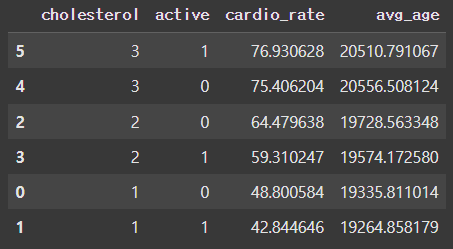

In [ ]:
# cholesterol과 active 기준으로 groupby한 뒤, cardio 발생률과 평균 나이 계산
chol_active_risk = merged_patient_crk.groupby(['cholesterol', 'active']).agg(
    cardio_rate=('cardio', 'mean'),  # 심장 질환 발생 비율
    avg_age=('age', 'mean')          # 평균 나이
).reset_index()

# cardio_rate를 백분율(%)로 변환
chol_active_risk['cardio_rate'] *= 100

# cardio 발생률 기준 내림차순 정렬
chol_active_risk = chol_active_risk.sort_values(by='cardio_rate', ascending=False)

chol_active_risk

,cholesterol,active,cardio_rate,avg_age
5,3,1,76.930628,20510.791067
4,3,0,75.406204,20556.508124
2,2,0,64.479638,19728.563348
3,2,1,59.310247,19574.172580
0,1,0,48.800584,19335.811014
1,1,1,42.844646,19264.858179


# **END**
수고하셨습니다.  
다음 구글폼에 **.ipynb** 파일 형식으로 제출해주세요.
https://docs.google.com/forms/d/e/1FAIpQLSffUB1vuh9mC0eCOjSCGW4P943G2dC4JXS0oG6mxiG2oaCRdg/viewform?usp=header


</br>


**좋은 결과 있으시길 바라며, 코딩테스트는 종합적인 평가 요소 중 하나일 뿐, 결정적인 요인이 아닙니다.**